# 🏥 Detección de Tuberculosis
### Luisa María Flórez - 000449529
### Samuel Pérez Hurtado - 000459067

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pca import pca
from factor_analyzer import FactorAnalyzer
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Preparación de los datos

In [2]:
train = pd.read_excel('https://www.robertohincapie.com/qetuo1357/TB/Entrenamiento_Data.xlsx')
train = train.drop(['Id'], axis=1)
train

,Tos,Expec,Edad_24,RPrevia,Vih_sida,DFumaC,ContactoTB,Hemoptisis,Sudoracion,Fiebre,Ppeso,Disnea,DPleuritico,IMC_18,Bodymassindex,Edad,PositivoTB
0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,22.145329,63,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,24.386526,58,0
2,1,1,1,1,0,0,0,0,0,0,0,0,1,0,27.343750,72,1
3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,25.000000,58,0
4,1,1,1,0,0,0,1,0,0,0,0,0,0,0,22.985398,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,1,1,1,1,0,1,0,0,1,1,1,1,1,1,17.175320,29,1
348,1,1,1,0,0,1,0,0,1,1,1,1,1,1,17.239048,28,1
349,1,1,1,0,0,1,1,0,0,0,0,0,0,0,21.153200,32,1
350,0,0,1,1,0,1,1,0,0,0,0,0,0,0,20.123457,40,1


In [3]:
test = pd.read_excel('https://www.robertohincapie.com/qetuo1357/TB/ValidacionData.xlsx')
test = test.drop(['tblEncuesta1_Sintomatico'], axis=1)
test = test.reindex(columns=['tos','Expec','Edad_24','RPrevia','Vih_sida','DFumaC','ContactoTB','Hemoptisis','Sudoracion','Fiebre','Ppeso','Disnea','DPleuritico','IMC_18','Bodymassindex','Edad','PositivoTB'])
test = test.rename({'tos': 'Tos'}, axis='columns')
test

,Tos,Expec,Edad_24,RPrevia,Vih_sida,DFumaC,ContactoTB,Hemoptisis,Sudoracion,Fiebre,Ppeso,Disnea,DPleuritico,IMC_18,Bodymassindex,Edad,PositivoTB
0,1,1,0,0,1,1,0,0,0,0,0,0,0,0.0,19.925130,18,0
1,1,1,0,1,0,1,0,0,0,0,0,0,0,0.0,20.415225,18,0
2,1,1,0,0,0,1,0,0,0,1,0,0,1,0.0,21.192742,18,0
3,1,1,0,0,0,1,0,0,0,1,0,0,0,NaN,21.192742,18,0
4,1,1,0,1,0,1,1,1,0,1,0,1,1,0.0,21.322449,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1,1,1,0,0,0,0,0,1,1,0,0,0,0.0,24.609375,75,0
1301,1,1,1,1,0,0,0,0,1,1,0,0,1,0.0,23.722811,79,0
1302,1,1,1,0,0,0,0,0,1,1,1,0,0,0.0,23.999459,83,0
1303,1,1,1,0,0,0,0,0,0,0,0,1,0,0.0,25.711662,83,0


In [4]:
train.isna().sum()

Tos              0
Expec            0
Edad_24          0
RPrevia          0
Vih_sida         0
DFumaC           0
ContactoTB       0
Hemoptisis       0
Sudoracion       0
Fiebre           0
Ppeso            0
Disnea           0
DPleuritico      0
IMC_18           0
Bodymassindex    0
Edad             0
PositivoTB       0
dtype: int64

In [5]:
test.isna().sum()

Tos               0
Expec             0
Edad_24           0
RPrevia           0
Vih_sida          0
DFumaC            0
ContactoTB        0
Hemoptisis        0
Sudoracion        0
Fiebre            0
Ppeso             0
Disnea            0
DPleuritico       0
IMC_18           42
Bodymassindex     0
Edad              0
PositivoTB        0
dtype: int64

In [6]:
for i, row in test.iterrows():
    if pd.isna(row['IMC_18']):
        if row['Bodymassindex'] < 18:
            test.loc[i, 'IMC_18'] = 1
        elif row['Bodymassindex'] > 18:
            test.loc[i, 'IMC_18'] = 0

In [7]:
test.isna().sum()

Tos              0
Expec            0
Edad_24          0
RPrevia          0
Vih_sida         0
DFumaC           0
ContactoTB       0
Hemoptisis       0
Sudoracion       0
Fiebre           0
Ppeso            0
Disnea           0
DPleuritico      0
IMC_18           0
Bodymassindex    0
Edad             0
PositivoTB       0
dtype: int64

In [8]:
print('Varianza:',train.cov().values.trace())

Varianza: 139.96942264653657


In [9]:
train.var()

Tos                0.048660
Expec              0.149184
Edad_24            0.198912
RPrevia            0.220595
Vih_sida           0.019546
DFumaC             0.221575
ContactoTB         0.250510
Hemoptisis         0.078186
Sudoracion         0.242934
Fiebre             0.220595
Ppeso              0.249903
Disnea             0.053743
DPleuritico        0.224416
IMC_18             0.046094
Bodymassindex     10.176793
Edad             127.399629
PositivoTB         0.168148
dtype: float64

In [10]:
test_unnormalized=test.drop(['PositivoTB'], axis=1)
train_unnormalized=train.drop(['PositivoTB'], axis=1)
min_max_scaler = MinMaxScaler()
train[['Bodymassindex']] = min_max_scaler.fit_transform(train[['Bodymassindex']])
test[['Bodymassindex']] = min_max_scaler.transform(test[['Bodymassindex']])
train[['Edad']] = min_max_scaler.fit_transform(train[['Edad']])
test[['Edad']] = min_max_scaler.transform(test[['Edad']])
train.var()

Tos              0.048660
Expec            0.149184
Edad_24          0.198912
RPrevia          0.220595
Vih_sida         0.019546
DFumaC           0.221575
ContactoTB       0.250510
Hemoptisis       0.078186
Sudoracion       0.242934
Fiebre           0.220595
Ppeso            0.249903
Disnea           0.053743
DPleuritico      0.224416
IMC_18           0.046094
Bodymassindex    0.022524
Edad             0.029247
PositivoTB       0.168148
dtype: float64

# Correlaciones

In [11]:
# Correlaciones 
correlaciones=train.corr()
correlaciones

,Tos,Expec,Edad_24,RPrevia,Vih_sida,DFumaC,ContactoTB,Hemoptisis,Sudoracion,Fiebre,Ppeso,Disnea,DPleuritico,IMC_18,Bodymassindex,Edad,PositivoTB
Tos,1.000000,0.392143,-0.055285,-0.140774,-0.059312,-0.053005,-0.019207,0.070859,-0.015335,0.051716,0.012624,-0.110158,0.111378,-0.068018,0.061184,-0.051446,-0.446141
Expec,0.392143,1.000000,-0.007518,0.029982,0.014389,-0.032765,-0.075026,0.117509,0.050338,0.045687,0.091214,0.020248,0.243467,0.003123,-0.131952,-0.086025,-0.078494
Edad_24,-0.055285,-0.007518,1.000000,0.195357,0.041537,-0.022207,-0.033648,-0.110073,-0.057733,0.004946,0.092934,0.095191,-0.101747,0.018934,0.086313,0.533434,0.053816
RPrevia,-0.140774,0.029982,0.195357,1.000000,-0.012449,-0.001318,-0.037977,-0.039073,-0.078422,0.031370,0.009307,0.064523,0.052783,-0.043905,0.019138,0.066204,0.096111
Vih_sida,-0.059312,0.014389,0.041537,-0.012449,1.000000,0.013283,-0.065120,0.029400,0.004816,-0.012449,-0.053039,0.052941,-0.015764,-0.032088,0.028681,0.082018,0.124661
DFumaC,-0.053005,-0.032765,-0.022207,-0.001318,0.013283,1.000000,0.032018,0.019186,0.071027,-0.039977,0.141710,0.067643,0.002759,0.073361,-0.273432,-0.082024,0.040087
ContactoTB,-0.019207,-0.075026,-0.033648,-0.037977,-0.065120,0.032018,1.000000,0.093111,-0.018012,0.034740,0.030084,-0.203407,-0.098414,-0.046172,-0.020738,-0.153624,-0.160544
Hemoptisis,0.070859,0.117509,-0.110073,-0.039073,0.029400,0.019186,0.093111,1.000000,0.013272,0.134475,0.078516,0.056937,0.061469,0.121071,-0.060425,-0.088224,0.015106
Sudoracion,-0.015335,0.050338,-0.057733,-0.078422,0.004816,0.071027,-0.018012,0.013272,1.000000,0.229252,0.296231,0.268322,0.085170,-0.000076,-0.166888,-0.095019,0.128348
Fiebre,0.051716,0.045687,0.004946,0.031370,-0.012449,-0.039977,0.034740,0.134475,0.229252,1.000000,0.288393,0.221518,0.078392,0.069109,-0.083960,0.018912,0.110904


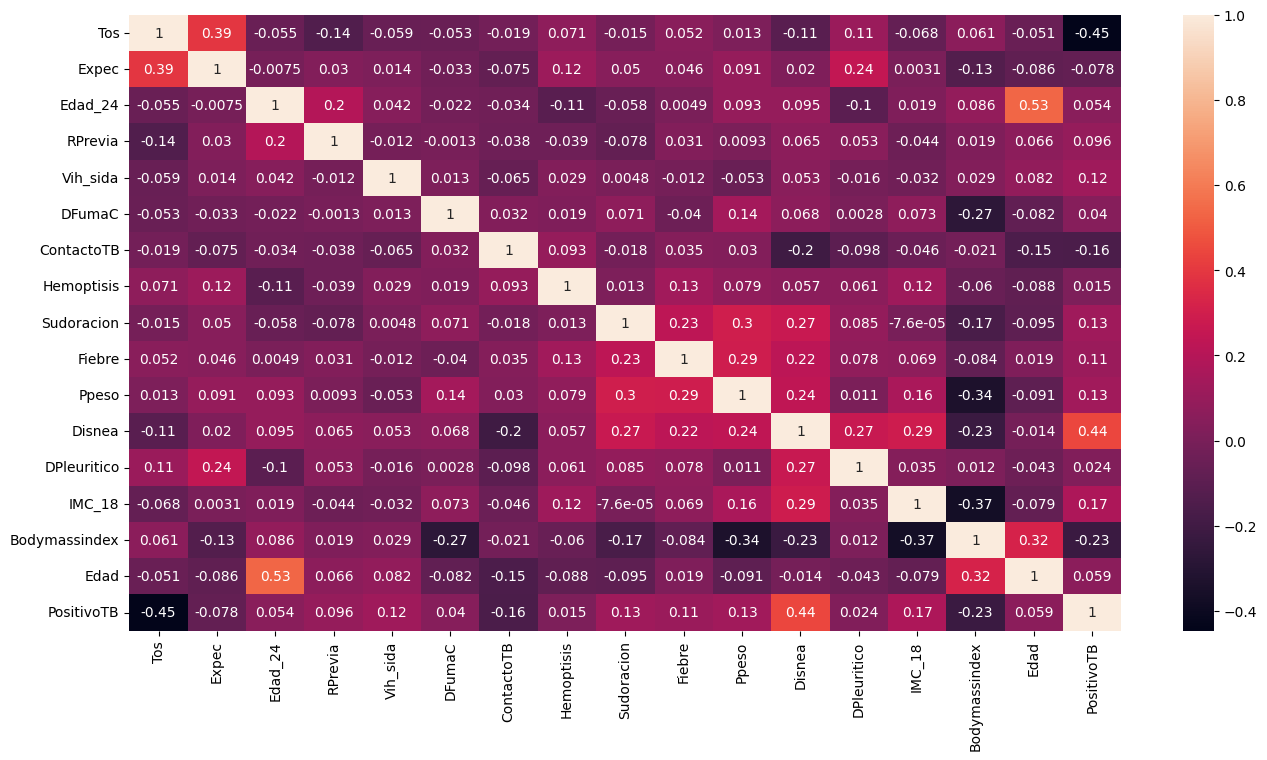

In [12]:
plt.figure(figsize=(16, 8))
sns.heatmap(correlaciones, annot=True)
plt.show()

In [13]:
#Correlaciones con la variable de interés
cor_variable_objetivo=correlaciones.loc['PositivoTB']
cor_variable_objetivo

Tos             -0.446141
Expec           -0.078494
Edad_24          0.053816
RPrevia          0.096111
Vih_sida         0.124661
DFumaC           0.040087
ContactoTB      -0.160544
Hemoptisis       0.015106
Sudoracion       0.128348
Fiebre           0.110904
Ppeso            0.133850
Disnea           0.441718
DPleuritico      0.024124
IMC_18           0.174034
Bodymassindex   -0.225024
Edad             0.058580
PositivoTB       1.000000
Name: PositivoTB, dtype: float64

In [14]:
cor_variable_objetivo.abs().sort_values(ascending=False)

PositivoTB       1.000000
Tos              0.446141
Disnea           0.441718
Bodymassindex    0.225024
IMC_18           0.174034
ContactoTB       0.160544
Ppeso            0.133850
Sudoracion       0.128348
Vih_sida         0.124661
Fiebre           0.110904
RPrevia          0.096111
Expec            0.078494
Edad             0.058580
Edad_24          0.053816
DFumaC           0.040087
DPleuritico      0.024124
Hemoptisis       0.015106
Name: PositivoTB, dtype: float64

In [15]:
X = train.drop('PositivoTB', axis=1)
Y = train['PositivoTB']
bestfeatures = SelectKBest(f_classif, k=5) #K es el numero de var relevantes.
fit = bestfeatures.fit(X, Y)
fit.get_feature_names_out()

array(['Tos', 'ContactoTB', 'Disnea', 'IMC_18', 'Bodymassindex'],
      dtype=object)

# Entropía

In [16]:
def entropia(p):
  return -np.sum([pi*np.log2(pi) if pi>0 else 0 for pi in p])

In [17]:
train['PositivoTB'].value_counts()

0    277
1     75
Name: PositivoTB, dtype: int64

In [18]:
#Entropía desertor
des = train['PositivoTB'].value_counts()
n= des.values
pr = np.array(n)/np.sum(n)
Ho=entropia(pr) #Entropía
print("La entropía de Positivo tuberculosis es:",Ho)

La entropía de Positivo tuberculosis es: 0.7473066703906602


In [19]:
nombres = []
entropias = []
ganancias = []

for columna in train.columns:
    H = 0
    nombres.append(columna)
    for i in train[columna].unique():
        df = train[train[columna] == i]
        des = df['PositivoTB'].value_counts()
        n = des.values
        pr = np.array(n) / np.sum(n)
        Hcond = entropia(pr)
        prob = len(df) / len(train)
        H = H + Hcond * prob
    entropias.append(H)
    ganancias.append(Ho - H)

data_entropia = {'Nombre de la variable': nombres, 'Entropía condicional': entropias, 'Ganancia de información': ganancias}
df_entropia = pd.DataFrame(data_entropia)
df_entropia = df_entropia.sort_values(by='Ganancia de información', ascending=False)

In [20]:
df_entropia

,Nombre de la variable,Entropía condicional,Ganancia de información
16,PositivoTB,0.000000,0.747307
14,Bodymassindex,0.062500,0.684807
0,Tos,0.625500,0.121807
11,Disnea,0.633740,0.113567
15,Edad,0.634149,0.113158
6,ContactoTB,0.728552,0.018755
13,IMC_18,0.729517,0.017790
10,Ppeso,0.734360,0.012947
8,Sudoracion,0.735577,0.011729
4,Vih_sida,0.738380,0.008926


# Análisis de Componentes Principales (PCA)

In [21]:
train_y = train['PositivoTB']
train = train.drop(['PositivoTB'], axis=1)

In [22]:
test_y = test['PositivoTB']
test = test.drop(['PositivoTB'], axis=1)

[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [16] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [10] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


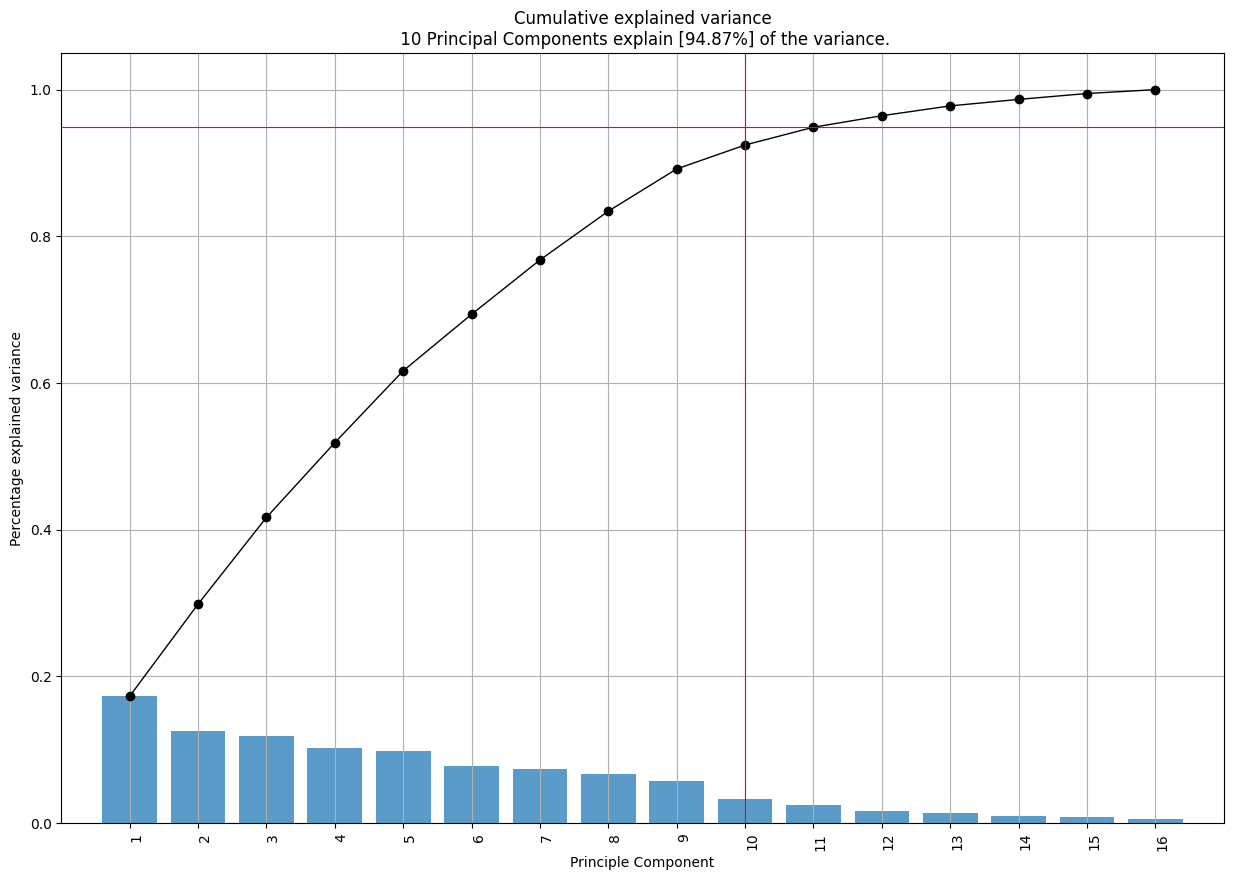

[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': '10 Principal Components explain [94.87%] of the variance'}, xlabel='PC1 (17.2% expl.var)', ylabel='PC2 (12.5% expl.var)'>)

<Figure size 640x480 with 0 Axes>

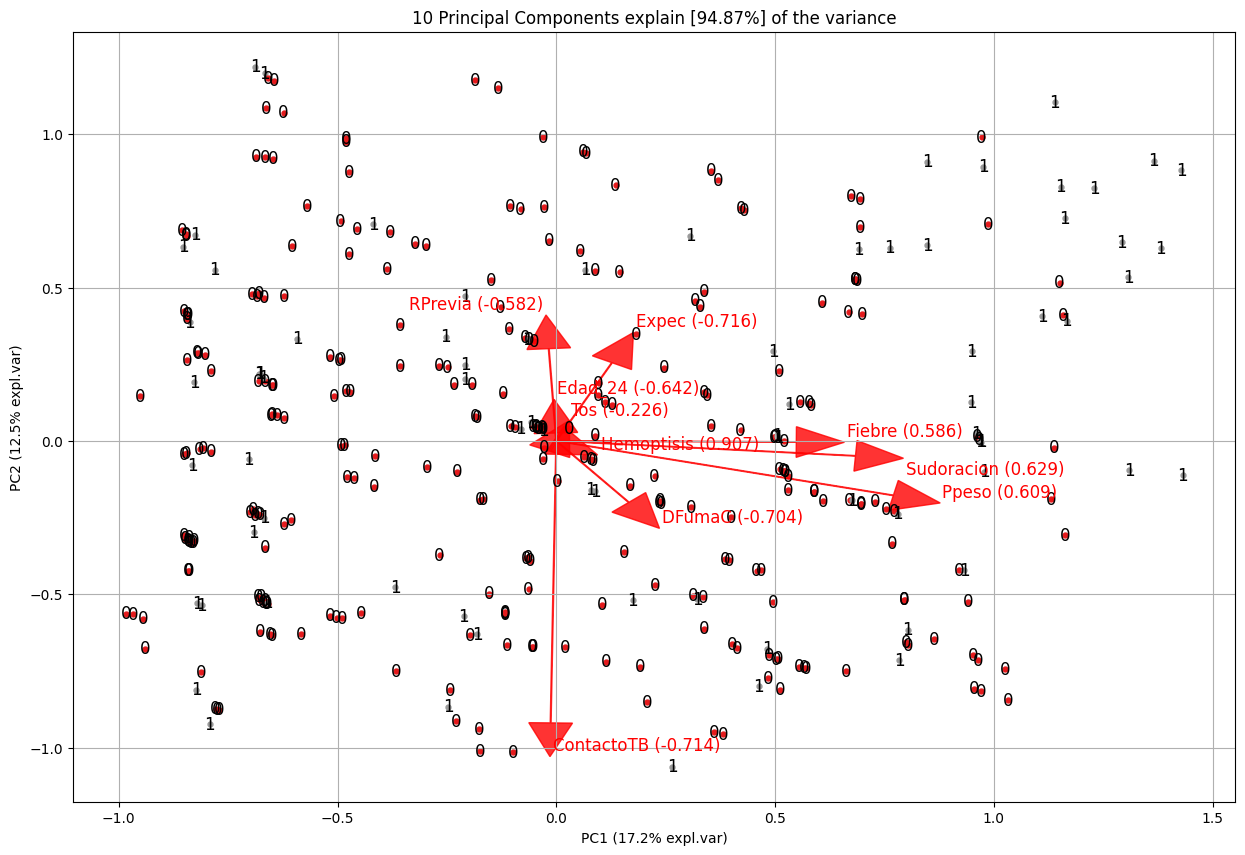

In [23]:
model = pca(n_components=0.9)
X=train.values
labels=train.columns
Y=train_y.values
results = model.fit_transform(X, col_labels=labels, row_labels=Y)
model.plot()
model.biplot(n_feat=10, legend=False)

In [24]:
pca_varianza = PCA()
pca_varianza.fit(train)

# Obtener varianza explicada por cada componente principal
explained_variance = pca_varianza.explained_variance_ratio_

# Imprimir varianza explicada por cada componente principal
for i in range(len(explained_variance)):
    print("Componente principal %d: %0.2f%% de varianza explicada" % (i+1, explained_variance[i]*100))

Componente principal 1: 17.28% de varianza explicada
Componente principal 2: 12.56% de varianza explicada
Componente principal 3: 11.82% de varianza explicada
Componente principal 4: 10.20% de varianza explicada
Componente principal 5: 9.80% de varianza explicada
Componente principal 6: 7.70% de varianza explicada
Componente principal 7: 7.41% de varianza explicada
Componente principal 8: 6.65% de varianza explicada
Componente principal 9: 5.76% de varianza explicada
Componente principal 10: 3.27% de varianza explicada
Componente principal 11: 2.42% de varianza explicada
Componente principal 12: 1.57% de varianza explicada
Componente principal 13: 1.34% de varianza explicada
Componente principal 14: 0.89% de varianza explicada
Componente principal 15: 0.80% de varianza explicada
Componente principal 16: 0.53% de varianza explicada


In [25]:
pca = PCA(n_components=10)
train_pca=pca.fit_transform(train.values)
test_pca=pca.transform(test.values)
train_pca_df=pd.DataFrame(train_pca, columns=['PC_'+str(i) for i in range(1,11)])
test_pca_df=pd.DataFrame(test_pca, columns=['PC_'+str(i) for i in range(1,11)])

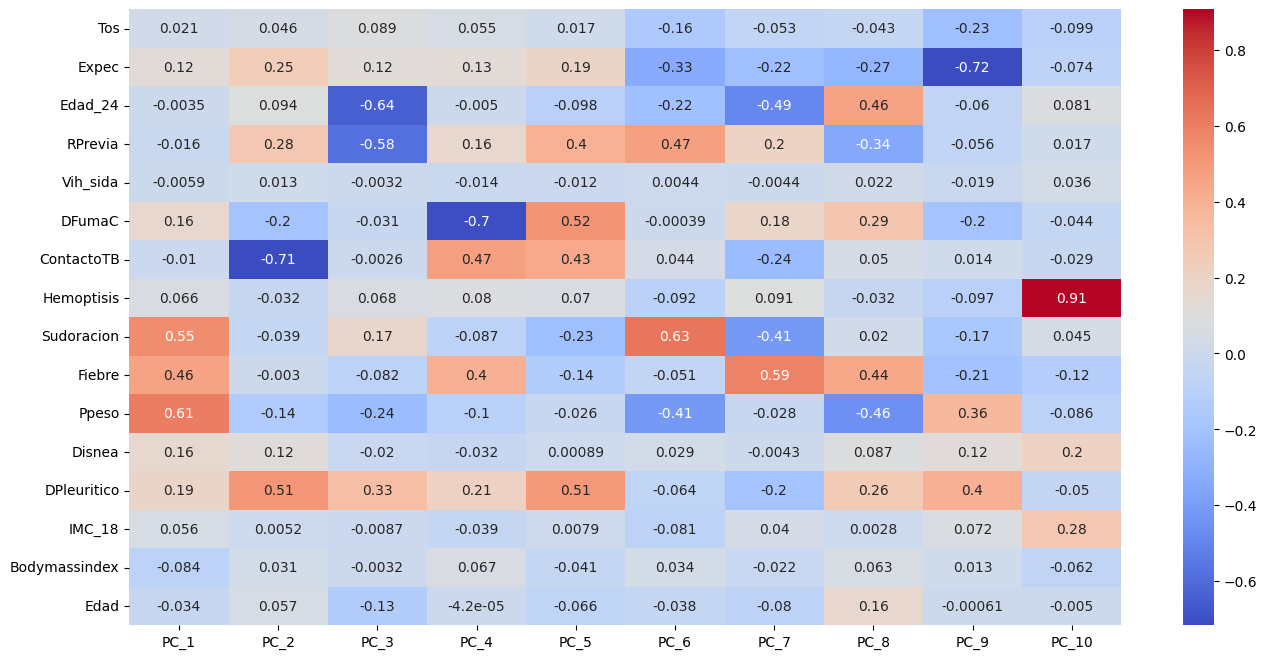

In [26]:
# Creamos un dataframe con las proyecciones de las variables originales sobre los componentes principales
df_loadings = pd.DataFrame(pca.components_.T, columns=[f"PC_{i+1}" for i in range(pca.n_components_)], index=train.columns)
plt.figure(figsize=(16, 8))
sns.heatmap(df_loadings, annot=True, cmap='coolwarm')
plt.show()

In [27]:
train_pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.647093,0.919885,0.291125,0.285545,-0.245061,-0.403006,-0.427714,0.273609,0.216053,-0.032177
1,-0.840905,0.411124,-0.033903,0.085317,-0.749849,-0.332620,-0.222333,0.009014,-0.182747,0.011354
2,-0.688461,1.219948,-0.309021,0.466604,0.131775,0.073286,-0.241825,-0.033586,0.163449,-0.031507
3,-0.843326,0.412014,-0.033995,0.087263,-0.751042,-0.331650,-0.222980,0.010840,-0.182369,0.009563
4,-0.829600,-0.331491,0.024063,0.551598,-0.283473,-0.272775,-0.426980,-0.021192,-0.169777,-0.011115


In [28]:
test_pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.641719,0.091594,0.652044,-0.641511,-0.092203,-0.093891,0.500335,-0.252007,-0.344330,-0.061275
1,-0.653984,0.364086,0.073376,-0.461305,0.314816,0.375711,0.706537,-0.617131,-0.380935,-0.082274
2,0.003549,0.585125,0.907242,-0.012874,0.284522,-0.211258,0.887598,0.429686,-0.130444,-0.274604
3,-0.183961,0.077400,0.572809,-0.220217,-0.220891,-0.147293,1.089281,0.170643,-0.530670,-0.224908
4,0.198556,0.244621,0.370574,0.670919,1.183654,0.243414,0.932927,0.189989,-0.150722,0.823780


# Análisis de Factores

In [29]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(train)
chi_square_value, p_value

(683.8843191203302, 8.700164530654124e-80)

El resultado del test de Bartlett indica que la matriz de correlación es adecuada para el análisis factorial y que los datos son adecuados para el análisis factorial. Sin embargo, es importante tener en cuenta que el test de Bartlett solo evalúa la idoneidad de la matriz de correlación y no es una medida completa de la adecuación del modelo para el análisis factorial.

In [30]:
import warnings
warnings.filterwarnings("ignore")
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(train)
kmo_model

0.5785608802404524

La matriz de covarianza es singular o casi singular, lo que sugiere que algunas variables están altamente correlacionadas y puede haber problemas con el análisis factorial. El valor de KMO obtenido de 0,57 indica una adecuada relación entre las variables. Por lo tanto, no se espera que haya problemas graves en el análisis factorial debido a la relación entre las variables.

In [31]:
fa_pre = FactorAnalyzer(n_factors=len(train.columns), rotation='varimax')
fa_pre.fit(train.values)
ev, v = fa_pre.get_eigenvalues()

optimal_n_factors = sum(ev >= 1)
print(f'El número óptimo de factores según el criterio de Kaiser es de: {optimal_n_factors}')

eigen_values, _ = np.linalg.eig(fa_pre.corr_)
print(pd.Series(eigen_values).sort_values(ascending=False))

El número óptimo de factores según el criterio de Kaiser es de: 8
0     2.331251
1     1.751065
2     1.562149
4     1.227081
9     1.157479
10    1.065857
11    1.055234
12    1.000853
15    0.868767
14    0.786376
13    0.712588
8     0.603736
7     0.561969
6     0.515216
5     0.439339
3     0.361040
dtype: float64


Factor:  1
- Edad->0.7392746621754582
- Edad_24->0.7361394202608879
Factor:  2
- Ppeso->0.5769344543987336
- Fiebre->0.5207311700873203
- Sudoracion->0.4923138188902869
Factor:  3
- Expec->0.8330531274623794
- Tos->0.5056225997266042
Factor:  4
- RPrevia->0.9886121256978716
Factor:  5
- Bodymassindex->-0.6719372218234347
- DFumaC->0.3719625491054462
Factor:  6
- Disnea->0.6639312887644591
- DPleuritico->0.37723039335996345
- ContactoTB->-0.3391005203456576
- Vih_sida->0.12745056726169823
Factor:  7
- Hemoptisis->0.8394556772381971
Factor:  8
- IMC_18->0.6240098492135061


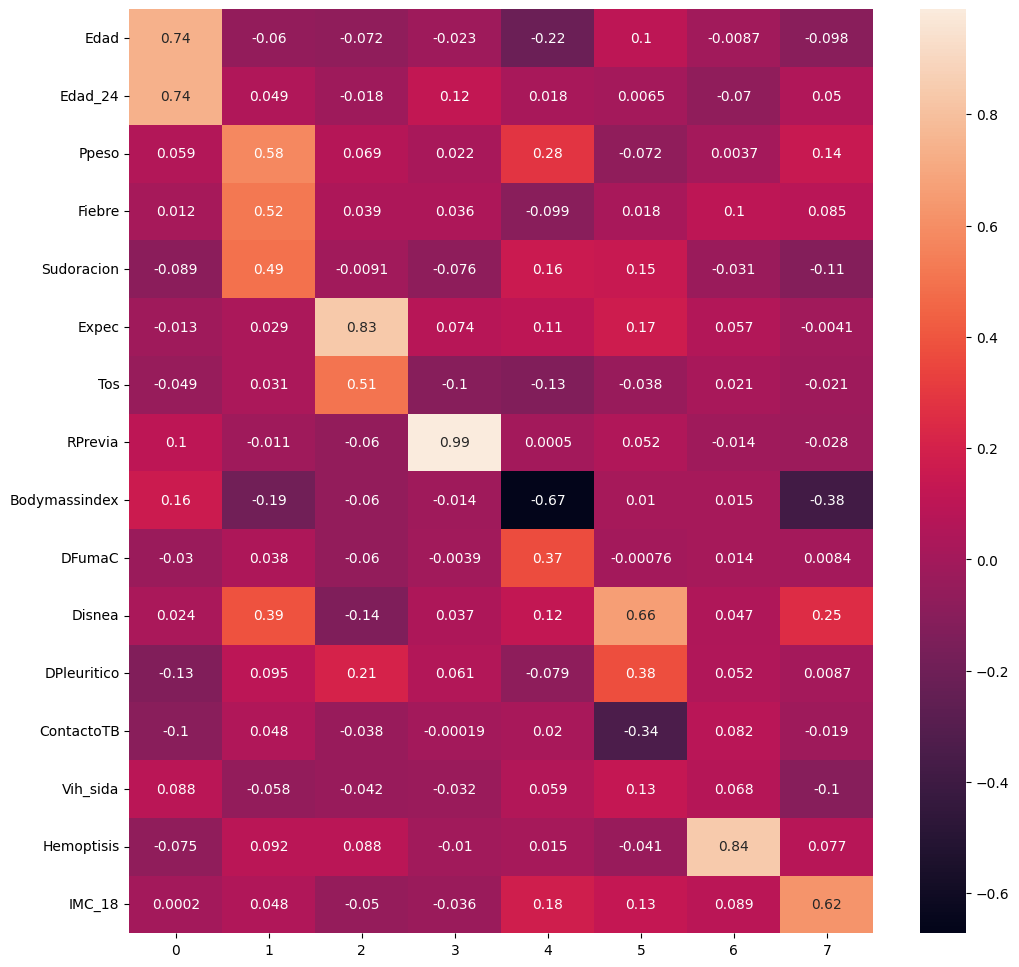

In [32]:
N=8
fa=FactorAnalyzer(n_factors=N, rotation='varimax')
fa.fit(train.values)
train_fa=fa.transform(train.values)
test_fa=fa.transform(test.values)

tmp=fa.loadings_
names=list(train.columns)
out=[]
cols=[]
fac=np.argmax(np.abs(tmp), axis=1)
for i in range(N):
  #Análisis del factor i-esimo
  print('Factor: ',i+1)
  tmp2=tmp[fac==i,:]
  names2=[names[int(a)] for a in list(np.where(fac==i)[0])]
  vmax=np.max(np.abs(tmp2), axis=1)
  ind=np.argsort(-vmax)
  for j in range(len(ind)):
    cols.append(names2[ind[j]])
    out.append(tmp2[ind[j]])
    print('- '+names2[ind[j]]+'->'+str(tmp2[ind[j]][np.argmax(np.abs(tmp2[ind[j]]))]))

plt.figure(figsize=(12,12))
sns.heatmap(out, annot=True)
borrar=plt.yticks(ticks=np.arange(len(cols))+0.5, labels=cols, rotation=0)

In [33]:
# Obtener las cargas de factor
loadings = fa.loadings_

# Interpretar los factores
factors = pd.DataFrame(loadings, index=train.columns)
factors.columns = ['Factor 1', 'Factor 2', 'Factor 3','Factor 4','Factor 5','Factor 6','Factor 7','Factor 8']

factors

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8
Tos,-0.049100,0.030588,0.505623,-0.101270,-0.133399,-0.037968,0.021388,-0.021481
Expec,-0.012676,0.029101,0.833053,0.074428,0.105465,0.169397,0.057155,-0.004096
Edad_24,0.736139,0.048642,-0.017919,0.121200,0.018248,0.006524,-0.070309,0.049629
RPrevia,0.102972,-0.010925,-0.060110,0.988612,0.000503,0.051920,-0.013837,-0.027501
Vih_sida,0.087615,-0.057785,-0.042135,-0.031800,0.059309,0.127451,0.067956,-0.103466
DFumaC,-0.029961,0.037861,-0.060098,-0.003919,0.371963,-0.000758,0.014388,0.008398
ContactoTB,-0.100430,0.048465,-0.037962,-0.000187,0.020426,-0.339101,0.082329,-0.018763
Hemoptisis,-0.074760,0.091750,0.087618,-0.010075,0.014833,-0.041135,0.839456,0.076668
Sudoracion,-0.088769,0.492314,-0.009065,-0.075888,0.156588,0.145211,-0.030876,-0.114999
Fiebre,0.012232,0.520731,0.039362,0.035536,-0.099398,0.018450,0.100885,0.084992


In [34]:
train_fa_df=pd.DataFrame(train_fa, columns=['F_'+str(i) for i in range(1,9)])
test_fa_df=pd.DataFrame(test_fa, columns=['F_'+str(i) for i in range(1,9)])

In [35]:
train_fa_df.head()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8
0,1.536942,-0.870871,0.553041,-0.875939,-0.357252,0.691838,-0.142397,0.044793
1,1.453997,-0.871696,0.450025,-0.856336,-0.629420,0.384519,-0.148299,-0.067207
2,1.892872,-0.896816,0.408316,1.206036,-1.390202,0.946566,-0.006256,-0.401438
3,1.454168,-0.869101,0.449325,-0.858201,-0.744306,0.402826,-0.140182,-0.109116
4,0.051085,-0.704522,0.462399,-0.648613,-0.223415,-0.266605,-0.271866,0.153150


In [36]:
test_fa_df.head()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8
0,-1.113880,-1.244942,0.153033,-0.635842,1.076222,0.569699,-0.074809,-0.517120
1,-1.361381,-0.979109,0.260079,1.567267,0.485777,0.125417,-0.294241,-0.033514
2,-1.468550,-0.268304,0.547136,-0.575069,-0.117627,0.284218,-0.288438,0.046168
3,-1.331317,-0.287007,0.441733,-0.573655,0.005521,-0.037092,-0.301419,0.069120
4,-1.573082,0.752401,-0.280622,1.557692,-0.243981,2.653388,2.891088,0.470182


# Pipeline (Búsqueda del mejor modelo)

In [37]:
def evaluacion_modelos(model,X_train,X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)  #Estas son las salidas generadas por el modelo (TEÓRICAS)
    y_train_pred = model.predict(X_train)

    print("******* Resultados de evaluación *******")

    clf_report = pd.DataFrame(classification_report(y_test,y_test_pred,output_dict=True))

    conf = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(conf, annot=True, fmt='d')

    TP=conf[1,1]
    TN=conf[0,0]
    FP=conf[0,1]
    FN=conf[1,0]

    print("Precisión %s \n" %precision_score(y_test, y_test_pred))
    print("Sensibilidad (se desea que sea alta) %s \n" %recall_score(y_test, y_test_pred))
    print("Instancias correctamente clasificadas %s \n" %accuracy_score(y_test, y_test_pred))

    print(clf_report)

## Árbol con PCA

******* Resultados de evaluación *******
Precisión 0.09130434782608696 

Sensibilidad (se desea que sea alta) 0.2916666666666667 

Instancias correctamente clasificadas 0.8007662835249042 

                     0          1  accuracy    macro avg  weighted avg
precision     0.952558   0.091304  0.800766     0.521931      0.905041
recall        0.830495   0.291667  0.800766     0.561081      0.800766
f1-score      0.887348   0.139073  0.800766     0.513211      0.846064
support    1233.000000  72.000000  0.800766  1305.000000   1305.000000

{'Arbol__criterion': 'gini', 'Arbol__max_depth': 9, 'ReductorDim__n_components': 12}
0.4666666666666667


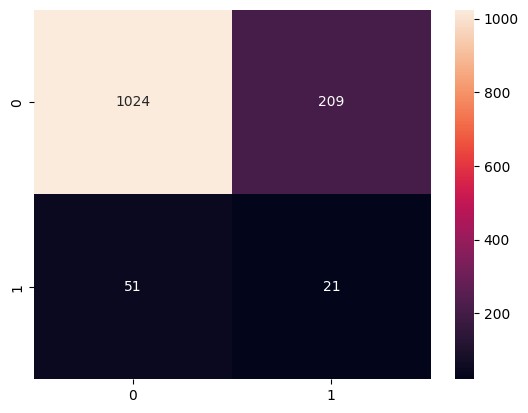

In [38]:
pipeline_tree_pca=Pipeline(steps=[('Normalizador',MinMaxScaler()),('ReductorDim',PCA()),
                         ('Arbol',DecisionTreeClassifier(max_depth=5, criterion='gini'))])
parametros_tree_pca={'ReductorDim__n_components':[7,8,9,10,11,12],'Arbol__max_depth':[2,3,4,5,6,7,8,9],
                    'Arbol__criterion':['gini','entropy']}
modelo_tree_pca = GridSearchCV(pipeline_tree_pca, parametros_tree_pca, scoring='recall', cv=5)
modelo_tree_pca_fit = modelo_tree_pca.fit(train_unnormalized,train_y)
y_pred_tree_pca = modelo_tree_pca.predict(test_unnormalized)
evaluacion_modelos(modelo_tree_pca, train_unnormalized, test_unnormalized, train_y, test_y)
print("")
print(modelo_tree_pca.best_params_)
print(modelo_tree_pca.best_score_)

## Árbol con Análisis de Factores

******* Resultados de evaluación *******
Precisión 0.08024691358024691 

Sensibilidad (se desea que sea alta) 0.5416666666666666 

Instancias correctamente clasificadas 0.632183908045977 

                     0          1  accuracy    macro avg  weighted avg
precision     0.959707   0.080247  0.632184     0.519977      0.911185
recall        0.637470   0.541667  0.632184     0.589568      0.632184
f1-score      0.766082   0.139785  0.632184     0.452933      0.731528
support    1233.000000  72.000000  0.632184  1305.000000   1305.000000

{'Arbol__criterion': 'gini', 'Arbol__max_depth': 8, 'ReductorDim__n_factors': 11}
0.6


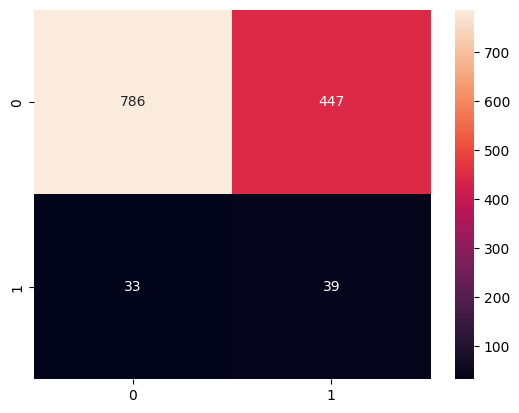

In [39]:
pipeline_tree_fa=Pipeline(steps=[('Normalizador',MinMaxScaler()),('ReductorDim',FactorAnalyzer(rotation='varimax')),
                    ('Arbol',DecisionTreeClassifier(max_depth=5, criterion='gini'))])
parametros_tree_fa={'ReductorDim__n_factors':[6,7,8,9,10,11,12],'Arbol__max_depth':[2,3,4,5,6,7,8,9],
                     'Arbol__criterion':['gini','entropy']}
modelo_tree_fa = GridSearchCV(pipeline_tree_fa, parametros_tree_fa, scoring='recall', cv=5)
modelo_tree_fa_fit = modelo_tree_fa.fit(train_unnormalized,train_y)
y_pred_tree_fa = modelo_tree_fa.predict(test_unnormalized)
evaluacion_modelos(modelo_tree_fa, train_unnormalized, test_unnormalized, train_y, test_y)
print("")
print(modelo_tree_fa.best_params_)
print(modelo_tree_fa.best_score_)

## Regresión Logística con PCA

******* Resultados de evaluación *******
Precisión 0.07183364839319471 

Sensibilidad (se desea que sea alta) 0.5277777777777778 

Instancias correctamente clasificadas 0.5977011494252874 

                     0          1  accuracy    macro avg  weighted avg
precision     0.956186   0.071834  0.597701     0.514010      0.907394
recall        0.601784   0.527778  0.597701     0.564781      0.597701
f1-score      0.738676   0.126456  0.597701     0.432566      0.704898
support    1233.000000  72.000000  0.597701  1305.000000   1305.000000

{'ReductorDim__n_components': 12, 'RegresionLogistica__C': 10}
0.3333333333333333


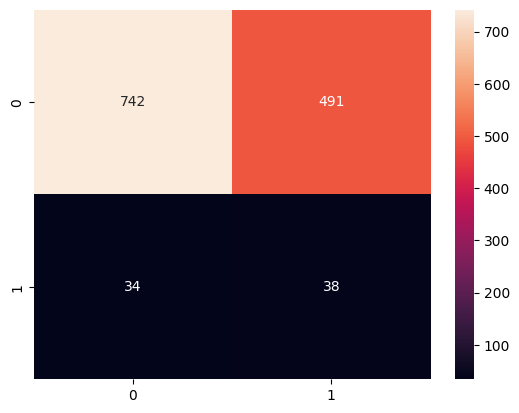

In [40]:
pipeline_lg_pca=Pipeline(steps=[('Normalizador',MinMaxScaler()),('ReductorDim',PCA()),
                         ('RegresionLogistica',LogisticRegression(random_state=42, n_jobs=-1))])
parametros_lg_pca={'ReductorDim__n_components':[7,8,9,10,11,12],'RegresionLogistica__C':[0.1, 1, 10]}
modelo_lg_pca = GridSearchCV(pipeline_lg_pca, parametros_lg_pca, scoring='recall', cv=5)
modelo_lg_pca_fit = modelo_lg_pca.fit(train_unnormalized,train_y)
y_pred_lg_pca = modelo_lg_pca.predict(test_unnormalized)
evaluacion_modelos(modelo_lg_pca, train_unnormalized, test_unnormalized, train_y, test_y)
print("")
print(modelo_lg_pca.best_params_)
print(modelo_lg_pca.best_score_)

## Regresión Logística con Análisis de Factores

******* Resultados de evaluación *******
Precisión 0.07606679035250463 

Sensibilidad (se desea que sea alta) 0.5694444444444444 

Instancias correctamente clasificadas 0.5946360153256705 

                     0          1  accuracy    macro avg  weighted avg
precision     0.959530   0.076067  0.594636     0.517798      0.910787
recall        0.596107   0.569444  0.594636     0.582776      0.594636
f1-score      0.735368   0.134206  0.594636     0.434787      0.702200
support    1233.000000  72.000000  0.594636  1305.000000   1305.000000

{'ReductorDim__n_factors': 12, 'RegresionLogistica__C': 10}
0.4533333333333333


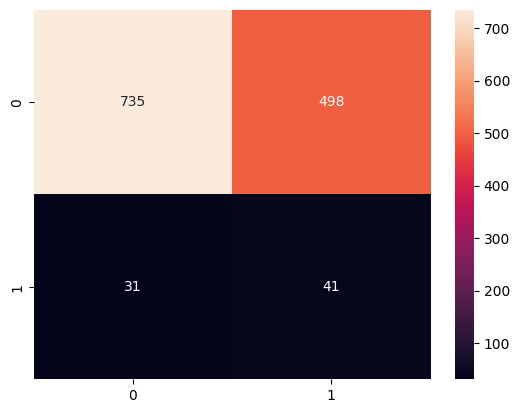

In [41]:
pipeline_lg_fa=Pipeline(steps=[('Normalizador',MinMaxScaler()),('ReductorDim',FactorAnalyzer(rotation='varimax')),
                         ('RegresionLogistica',LogisticRegression(random_state=42, n_jobs=-1))])
parametros_lg_fa={'ReductorDim__n_factors':[6,7,8,9,10,11,12],'RegresionLogistica__C':[0.1, 1, 10]}
modelo_lg_fa = GridSearchCV(pipeline_lg_fa, parametros_lg_fa, scoring='recall', cv=5)
modelo_lg_fa_fit = modelo_lg_fa.fit(train_unnormalized,train_y)
y_pred_lg_fa = modelo_lg_fa.predict(test_unnormalized)
evaluacion_modelos(modelo_lg_fa, train_unnormalized, test_unnormalized, train_y, test_y)
print("")
print(modelo_lg_fa.best_params_)
print(modelo_lg_fa.best_score_)

## Redes Neuronales con PCA

******* Resultados de evaluación *******
Precisión 0.09124087591240876 

Sensibilidad (se desea que sea alta) 0.3472222222222222 

Instancias correctamente clasificadas 0.7731800766283525 

                     0          1  accuracy    macro avg  weighted avg
precision     0.954413   0.091241   0.77318     0.522827      0.906790
recall        0.798054   0.347222   0.77318     0.572638      0.773180
f1-score      0.869258   0.144509   0.77318     0.506883      0.829272
support    1233.000000  72.000000   0.77318  1305.000000   1305.000000

{'RedNeuronal__activation': 'tanh', 'RedNeuronal__hidden_layer_sizes': (10,), 'ReductorDim__n_components': 11}
0.27999999999999997


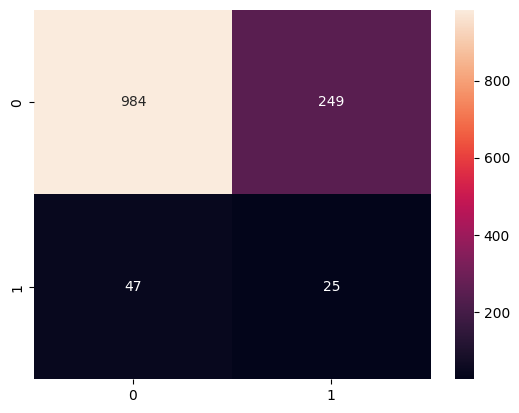

In [42]:
pipeline_redes_pca=Pipeline(steps=[('Normalizador',MinMaxScaler()),('ReductorDim',PCA()),
                        ('RedNeuronal', MLPClassifier())])
parametros_redes_pca={'ReductorDim__n_components':[9,10,11],'RedNeuronal__hidden_layer_sizes': [(8,), (9,), (10,)],
                        'RedNeuronal__activation': ['logistic', 'tanh', 'relu']}
modelo_redes_pca = GridSearchCV(pipeline_redes_pca, parametros_redes_pca, scoring='recall', cv=5)
modelo_redes_pca_fit = modelo_redes_pca.fit(train_unnormalized,train_y)
y_pred_redes_pca = modelo_redes_pca.predict(test_unnormalized)
evaluacion_modelos(modelo_redes_pca, train_unnormalized, test_unnormalized, train_y, test_y)
print("")
print(modelo_redes_pca.best_params_)
print(modelo_redes_pca.best_score_)

## Redes Neuronales con Análisis de Factores

******* Resultados de evaluación *******
Precisión 0.07751937984496124 

Sensibilidad (se desea que sea alta) 0.5555555555555556 

Instancias correctamente clasificadas 0.610727969348659 

                     0          1  accuracy    macro avg  weighted avg
precision     0.959442   0.077519  0.610728     0.518481      0.910785
recall        0.613950   0.555556  0.610728     0.584753      0.610728
f1-score      0.748764   0.136054  0.610728     0.442409      0.714959
support    1233.000000  72.000000  0.610728  1305.000000   1305.000000

{'RedNeuronal__activation': 'relu', 'RedNeuronal__hidden_layer_sizes': (9,), 'ReductorDim__n_factors': 9}
0.4666666666666667


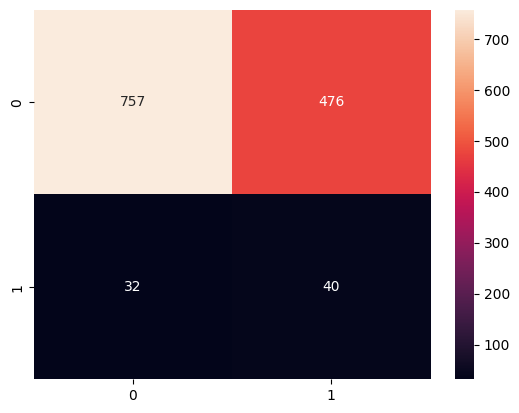

In [43]:
pipeline_redes_fa=Pipeline(steps=[('Normalizador',MinMaxScaler()),('ReductorDim',FactorAnalyzer(rotation='varimax')),
                         ('RedNeuronal', MLPClassifier())])
parametros_redes_fa={'ReductorDim__n_factors':[7,8,9],'RedNeuronal__hidden_layer_sizes': [(8,), (9,), (10,)],
                        'RedNeuronal__activation': ['logistic', 'tanh', 'relu']}
modelo_redes_fa = GridSearchCV(pipeline_redes_fa, parametros_redes_fa, scoring='recall', cv=5)
modelo_redes_fa_fit = modelo_redes_fa.fit(train_unnormalized,train_y)
y_pred_redes_fa = modelo_redes_fa.predict(test_unnormalized)
evaluacion_modelos(modelo_redes_fa, train_unnormalized, test_unnormalized, train_y, test_y)
print("")
print(modelo_redes_fa.best_params_)
print(modelo_redes_fa.best_score_)

# Exportar el mejor modelo

In [45]:
import pickle

filename = 'modelo.pkl'
variables= train.columns._values
pickle.dump([modelo_tree_fa_fit,variables,min_max_scaler], open(filename, 'wb'))

# Conclusiones

La matriz de correlación muestra que hay una correlación negativa moderada entre la variable de interés, Positivo Tuberculosis, y las variables Tos y Expec. Además, hay algunas variables que tienen una correlación positiva moderada con Positivo Tuberculosis, como Disnea, Ppeso, Sudoracion y Fiebre. Es importante tener en cuenta que la correlación no implica causalidad y se deben realizar análisis adicionales para determinar las relaciones entre las variables.

La matriz de ganancias de información condicional muestra que la variable Bodymassindex tiene la mayor ganancia de información, lo que indica que es la variable más relevante para predecir la variable objetivo. Por otro lado, las variables Tos, Disnea y Edad también tienen una ganancia de información alta, lo que sugiere que también son importantes para predecir la variable objetivo. En contraste, variables como Hemoptisis y DPleuritico tienen una ganancia de información muy baja, lo que sugiere que no son relevantes para predecir la variable objetivo. Es importante tener en cuenta que la entropía condicional y la ganancia de información no implican causalidad y se deben realizar análisis adicionales para determinar las relaciones entre las variables.

PCA:
- La componente principal 1 está fuertemente asociada con las variables Sudoración, Fiebre y Ppeso.
- La componente principal 2 está fuertemente asociada con las variables DPleuritico y No ContactoTB.
- La componente principal 3 está fuertemente asociada con las variables Edad>24 y No RPrevia.
- La componente principal 4 está fuertemente asociada con las variables ContactoTB y No DFumaC.
- La componente principal 5 está fuertemente asociada con las variables DFumaC, ContactoTB y DPleuritico.
- La componente principal 6 está fuertemente asociada con las variables Sudoracion y RPrevia.
- La componente principal 7 está fuertemente asociada con las variables Fiebre y Edad>24.
- La componente principal 8 está fuertemente asociada con las variables Edad<24, Fiebre y No Ppeso.
- La componente principal 9 está fuertemente asociada con las variables No Expec y DPleuritico.
- La componente principal 10 está fuertemente asociada con la variable Hemoptisis.

Análisis de factores:
- El factor 1 tiene dos variables con mayor carga factorial: Edad y Edad<24. Esto significa que este factor está indicando los años de vida que tienen los pacientes.
- El factor 2 tiene tres variables con mayor carga factorial: Ppeso, Fiebre y Sudoracion. Esto significa que este factor está indicando síntomas relacionados con cambios en el cuerpo.
- El factor 3 tiene dos variables con mayor carga factorial: Expec y Tos. Esto significa que este factor está indicando síntomas relacionados con la garganta, la tos y la expulsión de flemas.
- El factor 4 tiene una variable con mayor carga factorial: RPrevia. Esto significa que este factor está relacionado con la reclusión previa de los pacientes.
- El factor 5 tiene dos variables con mayor carga factorial: Bodymassindex y DFumaC. Esto sugiere que este factor está relacionado con la salud del paciente, si se cuida, hace deporte y no fuma.
- El factor 6 tiene cuatro variables con mayor carga factorial: Disnea, DPleuritico, ContactoTB, Vih_sida. Esto significa que este factor está relacionado con síntomas o preexistencias más graves.
- El factor 7 tiene una variable con mayor carga factorial: Hemoptisis. Esto significa que este factor está relacionado con la expectoración de sangre proveniente del árbol traqueobronquial.
- El factor 8 tiene una variable con mayor carga factorial: IMC<18. Esto significa que este factor está relacionado con pacientes que tienen un peso insuficiente.

El mejor modelo es el de Árbol de decisión con la sensibilidad y numero de instancias correctamente clasificadas más alta. 
Un recall bajo indica que el modelo está teniendo dificultades para identificar correctamente los casos positivos. Esto puede deberse a varias razones, como:
Desbalanceo de clases: Si la proporción de casos positivos y negativos en los datos es muy desigual, el modelo puede estar sesgado hacia la clase mayoritaria y tener dificultades para identificar correctamente los casos positivos.
Falta de datos: Si los datos de entrenamiento son escasos o incompletos, el modelo puede tener dificultades para aprender patrones importantes en los datos y generalizar a nuevos casos.